In [641]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

In [642]:
df = pd.read_csv('health_data.csv')

In [643]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [644]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [645]:
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [646]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [647]:
df.nunique(axis=0)

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [648]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Hiển thị số lượng giá trị bị thiếu cho mỗi cột

In [649]:
print(df.isna().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


Hiển thị số dòng giá trị bị trùng

In [650]:
df.duplicated().sum()

np.int64(0)

Số giá trị mắc bệnh đột quỵ và không mắc bệnh đột quỵ

In [651]:
df['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

Thay thế dữ liệu bị thiếu trong cột bmi bằng giá trị trung vị

In [652]:
bmi_median = df['bmi'].median()
print(bmi_median)
df['bmi'] = df['bmi'].fillna(bmi_median)
print(df['bmi'].head(10))

28.1
0    36.6
1    28.1
2    32.5
3    34.4
4    24.0
5    29.0
6    27.4
7    22.8
8    28.1
9    24.2
Name: bmi, dtype: float64


<Axes: xlabel='smoking_status', ylabel='count'>

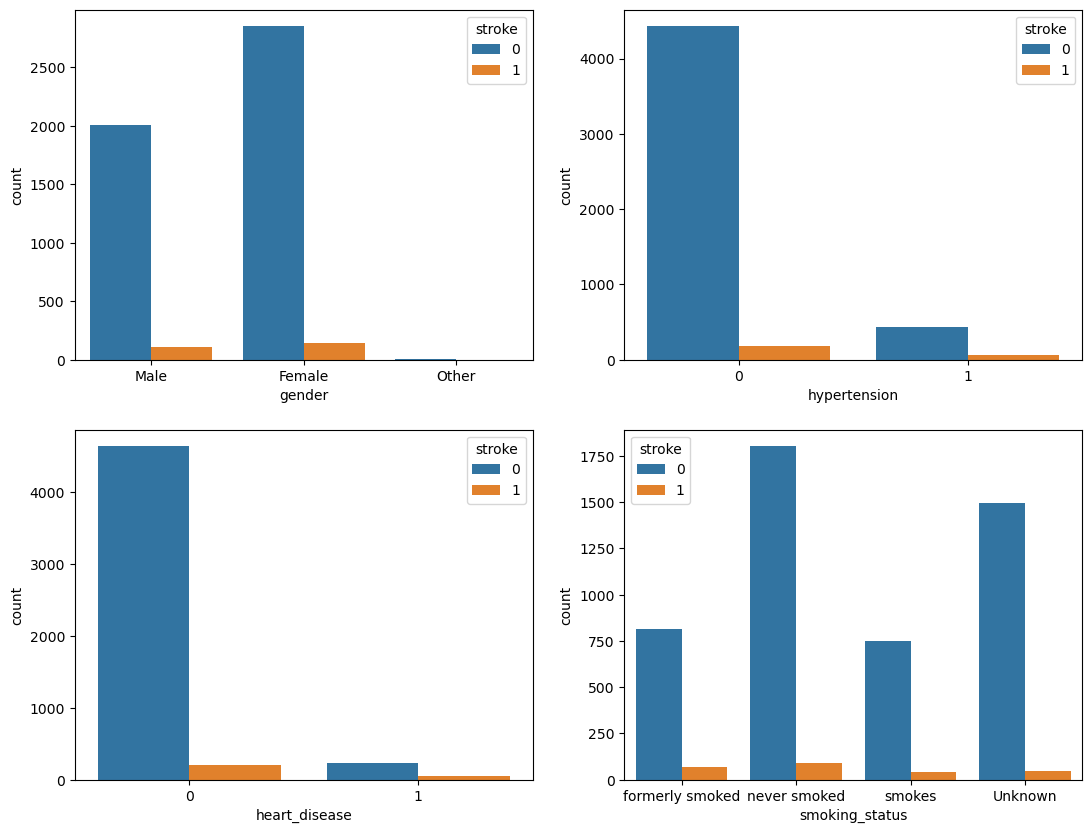

In [653]:
fig, axs = plt.subplots(2, 2, figsize=(13,10))
sns.countplot(ax = axs[0,0], x = df['gender'], hue = df['stroke'], data = df)
sns.countplot(ax = axs[0,1], x = df['hypertension'], hue = df['stroke'], data = df)
sns.countplot(ax = axs[1,0], x = df['heart_disease'], hue = df['stroke'], data = df)
sns.countplot(ax = axs[1,1], x = df['smoking_status'], hue = df['stroke'], data = df)

In [654]:
df_stroke = df[df['stroke'] == 1]
print(df_stroke)

        id  gender   age  hypertension  heart_disease ever_married  \
0     9046    Male  67.0             0              1          Yes   
1    51676  Female  61.0             0              0          Yes   
2    31112    Male  80.0             0              1          Yes   
3    60182  Female  49.0             0              0          Yes   
4     1665  Female  79.0             1              0          Yes   
..     ...     ...   ...           ...            ...          ...   
244  17739    Male  57.0             0              0          Yes   
245  49669  Female  14.0             0              0           No   
246  27153  Female  75.0             0              0          Yes   
247  34060    Male  71.0             1              0          Yes   
248  43424  Female  78.0             0              0          Yes   

         work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0          Private          Urban             228.69  36.6  formerly smoked   
1

Text(0.5, 1.0, 'Số người mắc bệnh đột quỵ theo bmi')

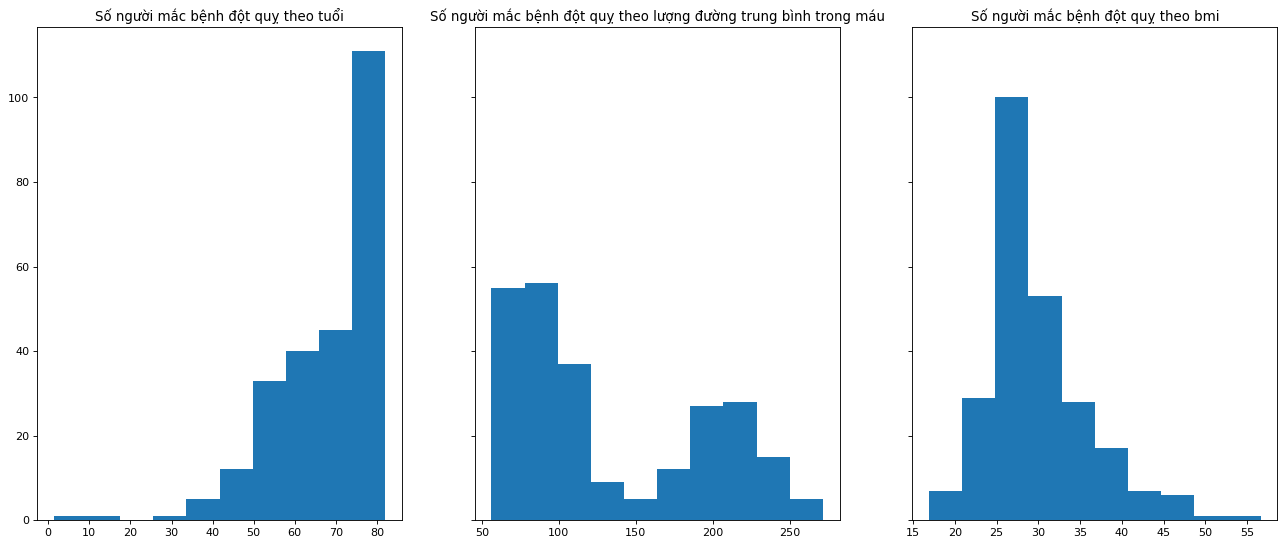

In [655]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(20,8), sharey=True, dpi=80)
ax1.hist(df_stroke['age'])
ax1.set_title('Số người mắc bệnh đột quỵ theo tuổi')
ax2.hist(df_stroke['avg_glucose_level'])
ax2.set_title('Số người mắc bệnh đột quỵ theo lượng đường trung bình trong máu')
ax3.hist(df_stroke['bmi'])
ax3.set_title('Số người mắc bệnh đột quỵ theo bmi')

Đổi dữ liệu từ dạng object về dạng số

In [656]:
cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
label_encoders = {}
for c in cols:
    le = LabelEncoder()
    df[c] = le.fit_transform(df[c])
    label_encoders[c] = le

Biểu đồ heatmap thể hiện mối tương quan của tất cả các thuộc tính với đột quỵ

<Axes: >

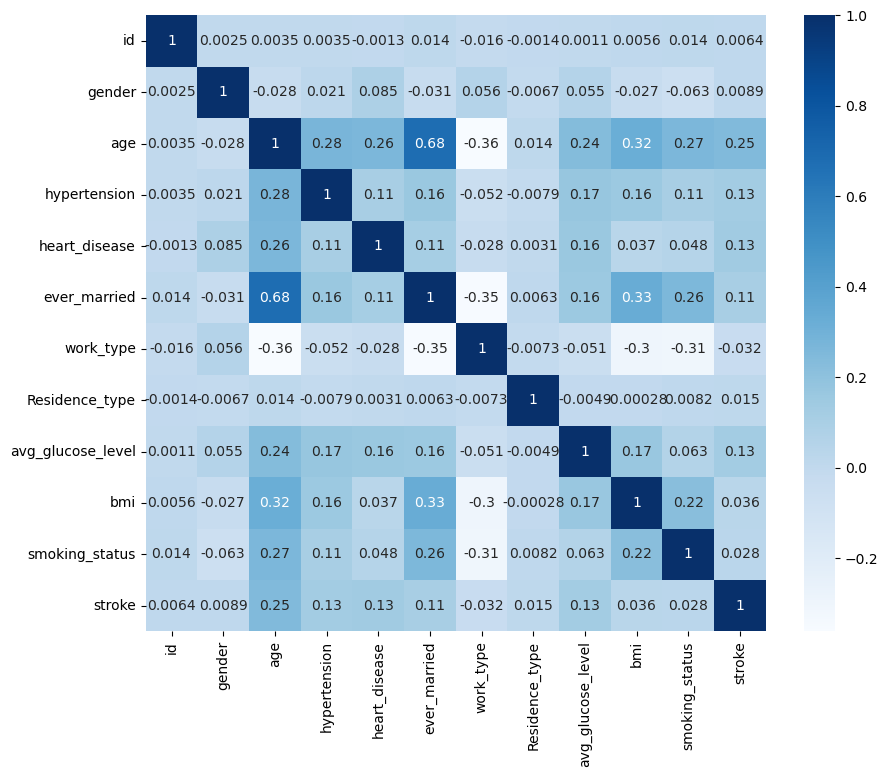

In [657]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(), annot=True, cmap='Blues')

Từ biểu đồ tương quan, chúng ta có thể thấy rằng age, hypertension, heart_disease, avg_glucose_level có mối tương quan chặt chẽ với đột quỵ, trong khi đó Residence_type, ever_married dường như không có mối tương quan với khả năng mắc bệnh đột quỵ. Vì vậy, không đưa 2 biến vào mô hình

Mô hình Decision Tree

In [658]:
features = ['gender', 'age', 'hypertension', 'heart_disease', 'work_type', 'avg_glucose_level', 'bmi', 'smoking_status']
X = df[features]
y = df['stroke']
print(X)
print(y)

      gender   age  hypertension  heart_disease  work_type  avg_glucose_level  \
0          1  67.0             0              1          2             228.69   
1          0  61.0             0              0          3             202.21   
2          1  80.0             0              1          2             105.92   
3          0  49.0             0              0          2             171.23   
4          0  79.0             1              0          3             174.12   
...      ...   ...           ...            ...        ...                ...   
5105       0  80.0             1              0          2              83.75   
5106       0  81.0             0              0          3             125.20   
5107       0  35.0             0              0          3              82.99   
5108       1  51.0             0              0          2             166.29   
5109       0  44.0             0              0          0              85.28   

       bmi  smoking_status 

Cân bằng dữ liệu

In [659]:
X, y = SMOTE().fit_resample(X, y)
y.value_counts()

stroke
1    4861
0    4861
Name: count, dtype: int64

Chia bộ dữ liệu thành 85% train và 15% test

In [660]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state=42, stratify=y)
print(X_train)
print(y_train)
print(X_test)
print(y_test)

      gender        age  hypertension  heart_disease  work_type  \
7562       1  58.479699             0              0          2   
4069       1  31.000000             0              0          2   
6910       0  80.726259             0              0          2   
8671       0  55.384564             0              0          0   
1718       1  59.000000             0              1          0   
...      ...        ...           ...            ...        ...   
8355       1  59.056210             0              0          2   
7932       0  80.292252             0              0          2   
5373       0  81.992916             0              0          2   
9708       0  79.007136             1              0          2   
427        0  43.000000             0              0          2   

      avg_glucose_level        bmi  smoking_status  
7562          84.185216  29.011428               2  
4069         108.620000  28.100000               3  
6910         213.339077  26.387428  

In [661]:
model = DecisionTreeClassifier(criterion = "entropy",
                                    random_state = 42,
                                    max_depth = 3,
                                    min_samples_leaf = 5)

In [662]:
model = model.fit(X_train, y_train)

In [663]:
y_pred = model.predict(X_test)
print("Giá trị mô hình dự đoán được là:\n",y_pred)

Giá trị mô hình dự đoán được là:
 [0 1 0 ... 1 1 1]


In [664]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[473 257]
 [ 56 673]]


In [665]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.65      0.75       730
           1       0.72      0.92      0.81       729

    accuracy                           0.79      1459
   macro avg       0.81      0.79      0.78      1459
weighted avg       0.81      0.79      0.78      1459



Mô hình Random Forest Classifier

In [666]:
model1 = RandomForestClassifier(
    n_estimators=250,       
    max_depth=10,           
    min_samples_split=8,    
    min_samples_leaf=3,     
    max_features='sqrt',    
    bootstrap=True,
    max_samples=0.85,       
    class_weight=None,      
    n_jobs=-1,
    random_state=42
)

In [667]:
model1 = model1.fit(X_train, y_train)

In [668]:
y_pred = model1.predict(X_test)
print("Giá trị mô hình dự đoán được là:\n",y_pred)

Giá trị mô hình dự đoán được là:
 [0 0 0 ... 1 1 1]


In [669]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[616 114]
 [ 36 693]]


In [670]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.84      0.89       730
           1       0.86      0.95      0.90       729

    accuracy                           0.90      1459
   macro avg       0.90      0.90      0.90      1459
weighted avg       0.90      0.90      0.90      1459

